In [ ]:
%%
The real estate company "ImmoEliza" wants to establish itself as the biggest one in all of Belgium. To pursue this goal, it needs to create a machine learning model to predict prices on Belgium's sales. That way, they can pick out the properties that are the most valuable to them.

But for this, it needs to do a preliminary analysis to gather some information. Having no in-house data scientist, they are looking for talented people to do it for them.

Since your last encounter with them went great, they reached out to you to do this job. Everything is in your hands now!

Take the dataset previously scraped to do the analysis. (If you were in different groups, decide together which dataset you are going to use.)
%%md

In [1]:
# Packages used
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Original data files
immoweb_scraping = 'final_list_houses_dataset.csv'

# Read the data and check the results
df = pd.read_csv(immoweb_scraping)
df.head()

# Display the data table for preview
df.columns

Index(['Unnamed: 0', 'Area [m²]', 'Price [€]', 'state of the building',
       'number of facades', 'number of bedrooms', 'fully equipped kitchen',
       'furnished', 'open fire', 'locality [zip code]',
       'surface of the land [m²]', 'terrace', 'terrace surface [m²]',
       'swimming pool', 'type of property', 'subtype of property', 'garden',
       'garden surface [m²]'],
      dtype='object')

In [2]:
# Check original data shape
df.shape

(10092, 18)

In [ ]:
# Explore the data
df.describe()
# Check if there is the gaps between mean and (max, mix) for each of variable/column
# Some variables have min: 0, 1

In [ ]:
#Step 1. Data Cleaning

#Check No duplicates
#Check No blank spaces (ex: " I love python " => "I love python")
# No errors -> needs to be accepted by data visualization methods
# No empty rows

# Data manipulating
# Rename the columns to retrieve easily

# Check the target, potential varible for correlation testing

# Check if each columns/variables exists NaN, zero, or incorrect data types values (ex: 'no' in price)

# Changes the datatypes for 
# Reports
# - How many missing values for each, zero -> calculate percentage of missing values
# - The outliers for each valriables
# - 


In [3]:
#Check No duplicates
print(df.duplicated())

0        False
1        False
2        False
3        False
4        False
         ...  
10087    False
10088    False
10089    False
10090    False
10091    False
Length: 10092, dtype: bool


In [5]:
#Return a new Data Frame with no empty cells:
df1 = df.dropna()
#print(df1.to_string())
df1.shape
df1

,Unnamed: 0,Area [m²],Price [€],state of the building,number of facades,number of bedrooms,fully equipped kitchen,furnished,open fire,locality [zip code],surface of the land [m²],terrace,terrace surface [m²],swimming pool,type of property,subtype of property,garden,garden surface [m²]
114,128,600.0,2950000,as new,4.0,5.0,installed,no,1.0,1640,2105.0,0,0,True,house,villa,0,0
254,280,336.0,899000,as new,4.0,3.0,usa hyper equipped,no,1.0,1851,2151.0,1,60,True,house,villa,1,1950
309,345,300.0,659000,as new,3.0,5.0,hyper equipped,no,1.0,4000,300.0,1,40,True,house,mansion,1,80
411,464,528.0,1895000,as new,4.0,10.0,installed,no,1.0,1410,5600.0,1,50,True,house,exceptiona,0,0
566,638,292.0,749000,as new,2.0,4.0,usa hyper equipped,no,1.0,2500,352.0,0,0,True,house,exceptiona,0,0
915,1027,320.0,1150000,good,4.0,5.0,installed,no,1.0,1600,8220.0,0,0,True,house,manor,0,0
1075,1208,510.0,1295000,as new,4.0,4.0,hyper equipped,no,1.0,2900,2816.0,1,50,True,house,exceptiona,0,0
1152,1299,265.0,1135000,as new,3.0,5.0,usa installed,yes,1.0,8300,400.0,1,30,True,house,house,1,300
1211,1361,424.0,1395000,good,4.0,5.0,installed,no,1.0,1390,5436.0,0,0,True,house,villa,0,0
1256,1410,185.0,440000,good,4.0,3.0,semi equipped,no,1.0,8540,1368.0,1,125,True,house,bungalow,1,1180


In [6]:
df1 = pd.DataFrame.copy(df) #df2 will get the new column names
df2 = df1.rename(columns = { 'Unnamed: 0':'ID',
                            'Area [m²]': 'area',
                            'Price [€]':'price',
                            'state of the building':'building_status', 
                            'number of facades':'number_facades', 
                            'number of bedrooms':'number_bedrooms',
                             'fully equipped kitchen':'kitchen_equipped',
                             'open fire':'open_fire',
                             'locality [zip code]':'zip_code',
                             'surface of the land [m²]':'land_surfaces',
                             'terrace surface [m²]':'terrace_surface',
                             'swimming pool':'swimming_pool',
                             'type of property':'property_type',
                             'subtype of property':'subtype_property',
                             'garden surface [m²]': 'garden_surface'}, inplace = False)
df2.head()
df2.dtypes

ID                    int64
area                float64
price                object
building_status      object
number_facades      float64
number_bedrooms     float64
kitchen_equipped     object
furnished            object
open_fire           float64
zip_code              int64
land_surfaces       float64
terrace               int64
terrace_surface       int64
swimming_pool        object
property_type        object
subtype_property     object
garden                int64
garden_surface        int64
dtype: object

In [7]:
# Create the subsets of data 


In [8]:
df2.isna().sum()/10092*100


ID                   0.000000
area                17.201744
price                0.000000
building_status     30.875941
number_facades      23.166865
number_bedrooms      1.506143
kitchen_equipped    33.917955
furnished           29.954419
open_fire           92.608006
zip_code             0.000000
land_surfaces        0.000000
terrace              0.000000
terrace_surface      0.000000
swimming_pool       96.036465
property_type        0.000000
subtype_property     0.000000
garden               0.000000
garden_surface       0.000000
dtype: float64

In [9]:
df2 = df2.replace('no', np.nan)
df2["price"] = pd.to_numeric(df2["price"])
#building_status        object
#df2['building_status'] is an object -> Create a new col named property_status, dtype: int
conditions = [(df2['building_status'] == 'as new'),
            (df2['building_status'] == 'good'),
            (df2['building_status'] == 'just renovated'),
            (df2['building_status'] == 'to renovate'),
            (df2['building_status'] == 'to be done up'),
            (df2['building_status'] == 'to restore')]
values = [1,2,3,4,5,6] #The NaN will be zero
df2['property_status'] = np.select(conditions, values)
#the zero 
#df2.building_status.value_counts()
df2['property_status'].value_counts()
#df2["property_status"] = pd.to_numeric(df2["property_status"])

df2.dtypes

ID                    int64
area                float64
price               float64
building_status      object
number_facades      float64
number_bedrooms     float64
kitchen_equipped     object
furnished            object
open_fire           float64
zip_code              int64
land_surfaces       float64
terrace               int64
terrace_surface       int64
swimming_pool        object
property_type        object
subtype_property     object
garden                int64
garden_surface        int64
property_status       int64
dtype: object

In [10]:
df2.subtype_property.value_counts()
conditions = [(df2['subtype_property'] == 'house'),
            (df2['subtype_property'] == 'villa'),
            (df2['subtype_property'] == 'mixed'),
            (df2['subtype_property'] == 'apartment'),
            (df2['subtype_property'] == 'exceptiona'),
            (df2['subtype_property'] == 'mansion'),
            (df2['subtype_property'] == 'country'),
            (df2['subtype_property'] == 'town'),
            (df2['subtype_property'] == 'bungalow'),
            (df2['subtype_property'] == 'building'),
            (df2['subtype_property'] == 'farmhouse'),
            (df2['subtype_property'] == 'manor'),
            (df2['subtype_property'] == 'castle'),
            (df2['subtype_property'] == 'other')|
            (df2['subtype_property'] == 'chalet')|
            (df2['subtype_property'] == 'land')] #combined last 3 cats
    

values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14] #The NaN will be zero
df2['subtype'] = np.select(conditions, values)
print(df2['subtype'].value_counts())
df2['subtype_property'].value_counts()
#df2.dtypes

1     7467
2     1141
3      306
4      294
5      254
6      181
7      102
8       99
9       73
10      62
11      43
14      31
12      22
13      17
Name: subtype, dtype: int64


house         7467
villa         1141
mixed          306
apartment      294
exceptiona     254
mansion        181
country        102
town            99
bungalow        73
building        62
farmhouse       43
manor           22
castle          17
other           17
chalet          13
land             1
Name: subtype_property, dtype: int64

In [12]:
df2 = df2.replace('no', np.nan)
df2["price"] = df2["price"].replace(np.nan, 0)
df2['area'].isna().sum()
df2['price'].isna().sum()
#df2['price'].value_counts()
len(df2[df2['price'] == 0])


34

In [ ]:
#Check if is there any different values of 0 va NaN for each columns




In [13]:
df3 = df2[df2['price'] != 0] #df3 eliminate 34 of 0 values
#len(df3[df3['price'] == 0])
df3.shape
df3.dtypes

ID                    int64
area                float64
price               float64
building_status      object
number_facades      float64
number_bedrooms     float64
kitchen_equipped     object
furnished            object
open_fire           float64
zip_code              int64
land_surfaces       float64
terrace               int64
terrace_surface       int64
swimming_pool        object
property_type        object
subtype_property     object
garden                int64
garden_surface        int64
property_status       int64
subtype               int64
dtype: object

In [15]:
#Create dataframe 4 df4, which put away null/nan values
condition= pd.notnull(df3["area"])
df4 = df3[condition]
#print(df4.head(5))
df4.dtypes

ID                    int64
area                float64
price               float64
building_status      object
number_facades      float64
number_bedrooms     float64
kitchen_equipped     object
furnished            object
open_fire           float64
zip_code              int64
land_surfaces       float64
terrace               int64
terrace_surface       int64
swimming_pool        object
property_type        object
subtype_property     object
garden                int64
garden_surface        int64
property_status       int64
subtype               int64
dtype: object

In [16]:
# Add new column 'Province' 
conditions = [ (1000 <= df4['zip_code']) & (df4['zip_code'] < 1300),
              (1300 <= df4['zip_code']) & (df4['zip_code'] < 1500),
              ((1500 <= df4['zip_code']) & (df4['zip_code'] < 2000))| 
              ((3000 <= df4['zip_code']) & (df4['zip_code'] < 3500)),
              (2000 <= df4['zip_code']) & (df4['zip_code'] < 3000),
              (3500 <= df4['zip_code']) & (df4['zip_code'] < 4000),
              (4000 <= df4['zip_code']) & (df4['zip_code'] < 5000),
              (5000 <= df4['zip_code']) & (df4['zip_code'] < 6000),
              (6600 <= df4['zip_code']) & (df4['zip_code'] < 7000),
              ((6000 <= df4['zip_code']) & (df4['zip_code'] <= 6599))|
              ((7000 <= df4['zip_code']) & (df4['zip_code'] < 8000)),
              (8000 <= df4['zip_code']) & (df4['zip_code'] < 9000),
              (9000 <= df4['zip_code']) & (df4['zip_code'] <= 9999)]
values = ['Brussel-Capital', 'Walloon Brabant','Flemish Brabant','Antwerp','Limburg','Liège','Namur','Luxembourg','Hainaut','West Flanders', 'East Flanders']
df4['Province'] = np.select(conditions, values)
df4.head()
df4.dtypes

<ipython-input-16-e07f2ab37f13>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Province'] = np.select(conditions, values)


ID                    int64
area                float64
price               float64
building_status      object
number_facades      float64
number_bedrooms     float64
kitchen_equipped     object
furnished            object
open_fire           float64
zip_code              int64
land_surfaces       float64
terrace               int64
terrace_surface       int64
swimming_pool        object
property_type        object
subtype_property     object
garden                int64
garden_surface        int64
property_status       int64
subtype               int64
Province             object
dtype: object

In [17]:
# Add new column 'zone3' 
conditions = [ (1000 <= df4['zip_code']) & (df4['zip_code'] < 1300),
              ((1300 <= df4['zip_code']) & (df4['zip_code'] < 1500))| 
              ((4000 <= df4['zip_code']) & (df4['zip_code'] < 8000)),
              ((1500 <= df4['zip_code']) & (df4['zip_code'] < 4000))| 
              ((8000 <= df4['zip_code']) & (df4['zip_code'] < 10000))]

values = ['Brussels_zone', 'Wallonia_zone','Flanders_zone']
df4['Zone'] = np.select(conditions, values)
df4['Zone'].value_counts()


<ipython-input-17-11f4b19f6c75>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Zone'] = np.select(conditions, values)


Flanders_zone    4616
Wallonia_zone    3133
Brussels_zone     584
Name: Zone, dtype: int64

In [18]:
conditions = [(df4['Zone'] == 'Brussels_zone'),
              (df4['Zone'] == 'Wallonia_zone'), 
              (df4['Zone'] == 'Flanders_zone')]

values = [1,2,3]
df4['zone_num'] = np.select(conditions, values)
df4['zone_num'].value_counts()

<ipython-input-18-b8c91c1f55ff>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['zone_num'] = np.select(conditions, values)


3    4616
2    3133
1     584
Name: zone_num, dtype: int64

In [19]:
#Create df5 file includes subtype, zone3, zone10
df4.dtypes
df4.to_csv('df5.csv')

In [ ]:
# Step 2. Data analysis

# Create new Series/columns to plot the data
#df4.groupby(['number_bedrooms','area']).price.agg(['min', 'max', np.mean,np.median])

# Check the target variables, input, output variables

# 

In [40]:
df5['price_per_m2'] = df5.price/df4.area
price_per_zone = df5.groupby('Zone')['price_per_m2'].mean()



<ipython-input-40-e1bd7f1467be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_per_m2'] = df4.price/df4.area


Zone
Brussels_zone    3580.303959
Flanders_zone    2248.999083
Wallonia_zone    1683.397381
Name: price_per_m2, dtype: float64

<ipython-input-54-638452e5b488>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_m2'] = df5.price/df5.area


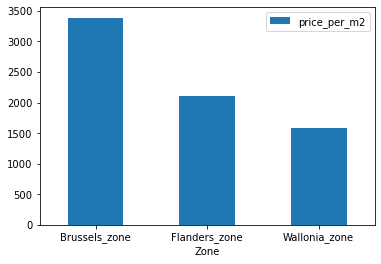

In [54]:

df5['price_per_m2'] = df5.price/df5.area
price_per_zone = df5.groupby('Zone')['price_per_m2'].mean()
df = pd.DataFrame(price_per_zone[0:3])
df.head()
ax = df.plot.bar(rot=0)

<ipython-input-55-0393defd522f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['price_per_room'] = df5.price/df5.number_bedrooms


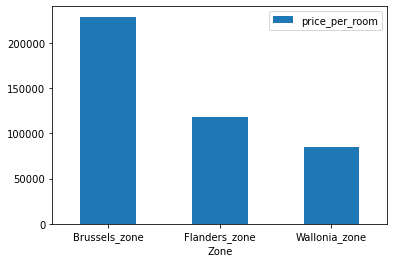

In [55]:
#Calculate price per rooms
df5['price_per_room'] = df5.price/df5.number_bedrooms
priceroom_per_zone = df4.groupby('Zone')['price_per_room'].mean()
price_per_room = df5.groupby('Zone')['price_per_room'].mean()
df = pd.DataFrame(price_per_room[0:3])
df.head()
ax = df.plot.bar(rot=0)


In [32]:
df4.dtypes

ID                    int64
area                float64
price               float64
building_status      object
number_facades      float64
number_bedrooms     float64
kitchen_equipped     object
furnished            object
open_fire           float64
zip_code              int64
land_surfaces       float64
terrace               int64
terrace_surface       int64
swimming_pool        object
property_type        object
subtype_property     object
garden                int64
garden_surface        int64
property_status       int64
subtype               int64
Province             object
Zone                 object
zone_num              int64
price_per_m2        float64
price_per_room      float64
dtype: object

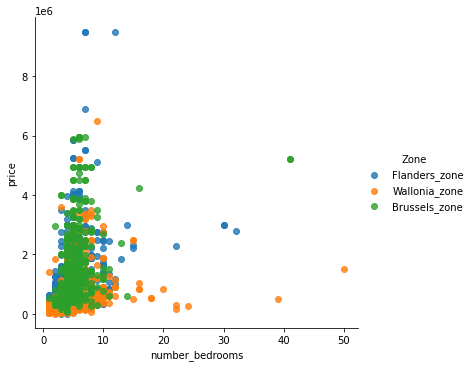

In [33]:
sns.lmplot(x='number_bedrooms', y='price', data=df5,
           fit_reg=False, 
           hue='Zone')  

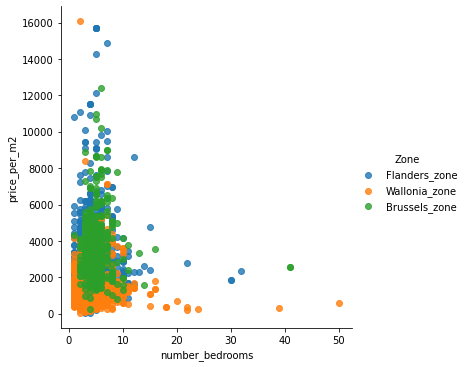

In [34]:
sns.lmplot(x='number_bedrooms', y='price_per_m2', data=df4,
           fit_reg=False, 
           hue='Zone') 

In [35]:
df_house = df4[df4['subtype']==1]  # New dataframe with only house
df_house.dtypes

ID                    int64
area                float64
price               float64
building_status      object
number_facades      float64
number_bedrooms     float64
kitchen_equipped     object
furnished            object
open_fire           float64
zip_code              int64
land_surfaces       float64
terrace               int64
terrace_surface       int64
swimming_pool        object
property_type        object
subtype_property     object
garden                int64
garden_surface        int64
property_status       int64
subtype               int64
Province             object
Zone                 object
zone_num              int64
price_per_m2        float64
price_per_room      float64
dtype: object

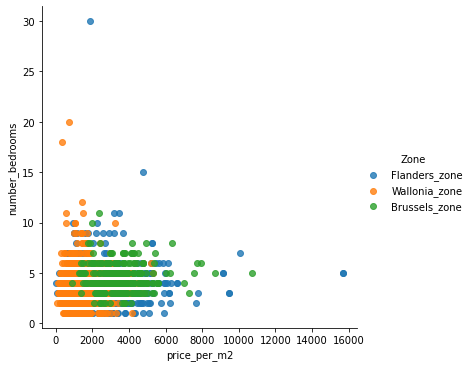

In [37]:
sns.lmplot(y='number_bedrooms', x='price_per_m2', data=df_house,
           fit_reg=False, 
           hue='Zone') 

In [ ]:
sns.lmplot(x='number_bedrooms', y='price', data=df_house,
           fit_reg=False, 
           hue='Zone') 

In [ ]:
# Step 3 : Data Interpretation


In [ ]:
df4.shape